<a href="https://colab.research.google.com/github/kathiravan1/100-Days-Of-ML-Code/blob/master/topicModeling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(Ldamodel, doc_term_matrix, dictionary)
#vis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7MB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 30.0MB/s 
     |████████████████████████████████| 15.3MB 270kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=2b47883a7c03e067eaeae5868f65176c0109b47065d1e21dbe22718393126ab6
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#data0 = pd.read_csv("/content/drive/MyDrive/dv/DataSet_DV.csv")
data = pd.read_csv("/content/drive/MyDrive/dv/reddit_TM.csv")

In [ ]:
#data1=pd.read_csv("/content/drive/MyDrive/dvdata/reddit3attributes.csv")

In [ ]:
#data0 = pd.read_csv("/content/drive/MyDrive/dvdata/Reddit1.csv")

In [ ]:
print(data.head(5))

                                            selftext
0  God saying "kas" really doesn't roll off the t...
1  [M,21] here.\n\nI have some social problem tha...
2  After out first date...where we had a great ni...
3  I have been with my girlfriend for about a yea...
4  My friends, I spent much of this year speaking...


In [ ]:
data.shape

(32933, 1)

In [ ]:
#data.drop('subreddit',
  #='columns', inplace=True)

In [ ]:
print (data.head(5))

                                            selftext
0  God saying "kas" really doesn't roll off the t...
1  [M,21] here.\n\nI have some social problem tha...
2  After out first date...where we had a great ni...
3  I have been with my girlfriend for about a yea...
4  My friends, I spent much of this year speaking...


In [ ]:
df0=data.rename(columns={"selftext": "Text"})
print (df0.head(5))

                                                Text
0  God saying "kas" really doesn't roll off the t...
1  [M,21] here.\n\nI have some social problem tha...
2  After out first date...where we had a great ni...
3  I have been with my girlfriend for about a yea...
4  My friends, I spent much of this year speaking...


In [ ]:
df0.shape

(32933, 1)

In [ ]:
#print (data0.head(5))

In [ ]:
#data = pd.concat([data0,df1], axis=0, ignore_index=True)
#data.shape

In [ ]:
print (df0.head(5))

                                                Text
0  God saying "kas" really doesn't roll off the t...
1  [M,21] here.\n\nI have some social problem tha...
2  After out first date...where we had a great ni...
3  I have been with my girlfriend for about a yea...
4  My friends, I spent much of this year speaking...


In [ ]:
# Convert to list
df = df0.Text.values.tolist()

df = [re.sub('\S*@\S*\s?', '',sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

print(df[:1])


['God saying "kas" really doesnt roll off the tounge doesnt it?']


In [ ]:
df = [re.sub("-", " ", sent) for sent in df]
df = [re.sub(":", "", sent) for sent in df]

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df))

In [ ]:

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:12]]

[[('say', 4),
  ('be', 1),
  ('feel', 1),
  ('grow', 1),
  ('know', 3),
  ('normal', 2),
  ('seem', 1),
  ('want', 2),
  ('ask', 1),
  ('back', 2),
  ('bed', 1),
  ('could', 1),
  ('date', 1),
  ('hard', 1),
  ('lot', 1),
  ('make', 3),
  ('mention', 1),
  ('much', 1),
  ('night', 1),
  ('try', 1),
  ('end', 1),
  ('last', 1),
  ('week', 1),
  ('become', 1),
  ('big', 1),
  ('head', 1),
  ('mind', 2),
  ('nee', 1),
  ('person', 1),
  ('physical', 1),
  ('reason', 1),
  ('scared', 1),
  ('small', 1),
  ('take', 1),
  ('therapist', 1),
  ('well', 1),
  ('already', 1),
  ('figure', 1),
  ('obviously', 1),
  ('ruin', 1),
  ('sometimes', 1),
  ('bit', 3),
  ('basically', 1),
  ('issue', 1),
  ('position', 2),
  ('show', 1),
  ('wear', 1),
  ('alot', 1),
  ('appreciate', 1),
  ('appreciation', 1),
  ('arm', 1),
  ('awhile', 1),
  ('behavior', 1),
  ('bother', 1),
  ('breaking', 1),
  ('burn', 1),
  ('caress', 1),
  ('comfort', 2),
  ('comfortable', 2),
  ('communicate', 1),
  ('compassionate

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"be" + 0.023*"feel" + 0.018*"have" + 0.014*"anxiety" + 0.014*"people" '
  '+ 0.012*"know" + 0.012*"make" + 0.011*"get" + 0.011*"think" + 0.011*"help"'),
 (1,
  '0.027*"parent" + 0.021*"family" + 0.021*"child" + 0.016*"mom" + '
  '0.015*"mother" + 0.012*"kid" + 0.012*"abuse" + 0.012*"old" + '
  '0.009*"brother" + 0.009*"sister"'),
 (2,
  '0.023*"want" + 0.019*"know" + 0.019*"friend" + 0.017*"would" + 0.017*"say" '
  '+ 0.017*"go" + 0.016*"s" + 0.016*"time" + 0.016*"tell" + 0.015*"really"'),
 (3,
  '0.033*"go" + 0.022*"get" + 0.016*"day" + 0.012*"say" + 0.011*"come" + '
  '0.011*"night" + 0.010*"hour" + 0.009*"home" + 0.009*"take" + 0.008*"watch"'),
 (4,
  '0.034*"job" + 0.032*"work" + 0.022*"live" + 0.020*"year" + 0.019*"would" + '
  '0.015*"school" + 0.014*"move" + 0.014*"money" + 0.013*"pay" + 0.013*"want"')]


In [ ]:

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.998202422446057

Coherence Score:  0.36153134558383837


In [ ]:
# Visualize the topics

#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

#vis

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=6, step=1)

ValueError: ignored

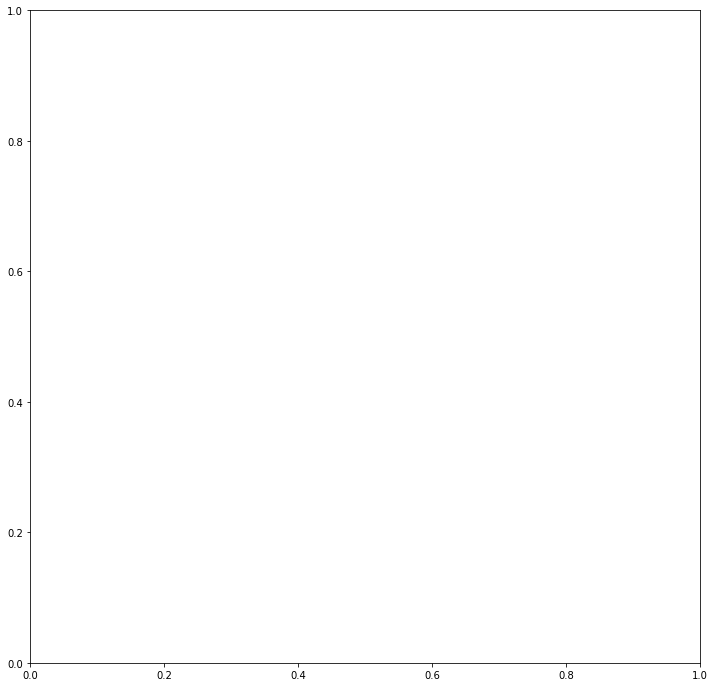

In [ ]:
limit=3; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.281
Num Topics = 2  has Coherence Value of 0.2773


In [ ]:
# Select the model and print the topics

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"be" + 0.017*"go" + 0.017*"want" + 0.016*"friend" + 0.015*"say" + '
  '0.015*"know" + 0.015*"feel" + 0.013*"time" + 0.013*"really" + 0.012*"s"'),
 (1,
  '0.016*"would" + 0.013*"say" + 0.013*"tell" + 0.013*"want" + 0.012*"year" + '
  '0.012*"go" + 0.011*"know" + 0.010*"thing" + 0.010*"time" + '
  '0.010*"relationship"'),
 (2,
  '0.016*"go" + 0.015*"get" + 0.013*"be" + 0.012*"work" + 0.010*"would" + '
  '0.008*"take" + 0.008*"time" + 0.007*"make" + 0.007*"know" + 0.006*"day"'),
 (3,
  '0.030*"be" + 0.016*"feel" + 0.012*"get" + 0.012*"go" + 0.012*"have" + '
  '0.010*"want" + 0.010*"know" + 0.009*"make" + 0.009*"really" + 0.009*"time"')]


In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

   
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


print (df_dominant_topic.head(15))

    Document_No  ...                                               Text
0             0  ...  God saying "kas" really doesnt roll off the to...
1             1  ...  [M,21] here. I have some social problem that I...
2             2  ...  After out first date...where we had a great ni...
3             3  ...  I have been with my girlfriend for about a yea...
4             4  ...  My friends, I spent much of this year speaking...
5             5  ...  You guys may be aware of this already but I ju...
6             6  ...  So last night i broke my hand punching a chair...
7             7  ...  Hey everyone, I just had broken up with my gir...
8             8  ...  I happen to work with my partner in a restaura...
9             9  ...  Just moved to new city ~6 months ago, first jo...
10           10  ...  Around 7 oclock last night I was getting ready...
11           11  ...  I have been dating a woman that is 30 for a fe...
12           12  ...  It just happened like 2 hours ago and Im s

In [ ]:
input = df_dominant_topic[['Dominant_Topic','Text']]

In [ ]:
input.shape

(32933, 2)

In [ ]:
pip install pandas --upgrade

In [ ]:
pip install pandas==1.1.3

In [ ]:
print (input.head(10))

   Dominant_Topic                                               Text
0             0.0  God saying "kas" really doesnt roll off the to...
1             3.0  [M,21] here. I have some social problem that I...
2             0.0  After out first date...where we had a great ni...
3             0.0  I have been with my girlfriend for about a yea...
4             3.0  My friends, I spent much of this year speaking...
5             3.0  You guys may be aware of this already but I ju...
6             1.0  So last night i broke my hand punching a chair...
7             2.0  Hey everyone, I just had broken up with my gir...
8             1.0  I happen to work with my partner in a restaura...
9             0.0  Just moved to new city ~6 months ago, first jo...


In [ ]:
X1=input.to_csv('tmodel.csv',index=False)

ImportError: ignored

In [ ]:
input=input.rename(columns={"Dominant_Topic": "class"})
print (input.head(5))

   class                                               Text
0    0.0  God saying "kas" really doesnt roll off the to...
1    3.0  [M,21] here. I have some social problem that I...
2    0.0  After out first date...where we had a great ni...
3    0.0  I have been with my girlfriend for about a yea...
4    3.0  My friends, I spent much of this year speaking...


In [ ]:
X, y = input['Text'], input['class']

In [ ]:
documents = []
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[4842    8  102  320]
 [ 850  619   84  178]
 [ 535   91 1112  632]
 [ 637   51  155 2958]]
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80      5272
         1.0       0.80      0.36      0.50      1731
         2.0       0.77      0.47      0.58      2370
         3.0       0.72      0.78      0.75      3801

    accuracy                           0.72     13174
   macro avg       0.75      0.63      0.66     13174
weighted avg       0.73      0.72      0.71     13174

0.723470472142098


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5272
         1.0       0.86      0.73      0.79      1731
         2.0       0.79      0.77      0.78      2370
         3.0       0.85      0.86      0.85      3801

    accuracy                           0.85     13174
   macro avg       0.84      0.82      0.83     13174
weighted avg       0.85      0.85      0.85     13174



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[4860,   69,  152,  191],
       [ 271, 1260,   94,  106],
       [ 176,   68, 1827,  299],
       [ 224,   62,  236, 3279]])

In [ ]:
result = logmodel.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 85.213%


In [58]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:' , accuracy_score(y_test, predictions))
#print('Precision score:' , precision_score(y_test, predictions))
#print('Recall score: ', recall_score(y_test, predictions))

Accuracy score: 0.7940640655837256


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
predictions = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test, predictions)*100)

SVM Accuracy Score ->  84.05951115834219


In [56]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
predictions= knn.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.423257932290876
